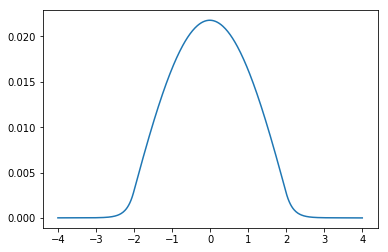

In [33]:
import numpy as np
import matplotlib.pylab as plt
from math import fabs

def fwell(x,prm):
    l = prm[0]
    v0 = prm[1]
    E = prm[2]
    
    if fabs(x)<=l/2.:
        return -E
    else:
        return v0-E
        


def numerov(xi,xf,n,f,phi0,prm):
    
    h = (xf-xi)/(1.0*n)
    x = np.arange(xi,xf+h,h)
    phi = np.zeros([np.shape(x)[0]])
    phi[0]=phi0[0]
    phi[1]=phi0[1]
    
    for i in range(2,np.shape(x)[0]):
       
        
        aux1 = 2.*phi[i-1]*(1.+5.*h**2*f(x[i-1],prm)/12.)
        aux2 = phi[i-2]*(1-h**2*f(x[i-2],prm)/12.)
        aux3 = 1-h**2*f(x[i],prm)/12. # x+h = x[i]
        phi[i] =(aux1-aux2)/aux3
        
        
        
        
    return x,phi



        

L = 4.
V0 = 30.
E = 0.517660570145
x,phi= numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,E])
plt.plot(x,phi)
plt.show()

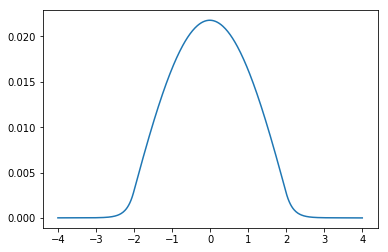

In [40]:
import numpy as np
import matplotlib.pylab as plt
from math import fabs

def fwell(x,prm):
    l = prm[0]
    v0 = prm[1]
    E = prm[2]
    
    if fabs(x)<=l/2.:
        return -E
    else:
        return v0-E
        


def numerov(xi,xf,n,f,phi0,prm):

    
    h = (xf-xi)/(1.0*n)
    x = np.arange(xi,xf+h,h)
    phi = np.zeros([np.shape(x)[0]])
    phi[0]=phi0[0]
    phi[1]=phi0[1]
    
    for i in range(2,np.shape(x)[0]):
       
        
        aux1 = 2.*phi[i-1]*(1.+5.*h**2*f(x[i-1],prm)/12.)
        aux2 = phi[i-2]*(1-h**2*f(x[i-2],prm)/12.)
        aux3 = 1-h**2*f(x[i],prm)/12. # x+h = x[i]
        phi[i] =(aux1-aux2)/aux3
        
        
        
        
    return x,phi



        

L = 4.
V0 = 30.
E = 0.517660570145

#E = 0.5
x,phi= numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,E])
plt.plot(x,phi)
plt.show()

In [39]:
def bis(a0,b0,tol):
    # intervalos  0.01
    
    
    fa,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,a0])
    fb,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,b0])
    if fa[-1]*fb[-1]>0.:
        return 'El intervalo no da información'
    
    c=(a0+b0)/2.
    fc,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,c])
    while abs(fc[-1]) > tol:
        
        fa,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,a0])
        fc,_ = numerov(-L,L,500,fwell,[0.,1e-8],[L,V0,c])
        
        if fa[-1]*fc[-1]<0:
            b0 = c
        else:
            
            a0 = c
        c = (a0+b0)/2.
    return c

a0 = 0
b0 = 1
tol = 10**-6

        
print(bis(a0,b0,tol))

El intervalo no da información
